In [2]:
pip install h5py ipywidgets

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


# Loading library

In [1]:
from waveformtools.transforms import Yslm_vec
from waveformtools.grids import UniformGrid
from mpl_toolkits.mplot3d import Axes3D
import h5py
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import warnings
import lal

lal.swig_redirect_standard_output_error(True)


/home/bhuvaneshwari/anaconda3/lib/python3.11/site-packages/waveformtools
No module named 'config'


/home/bhuvaneshwari/anaconda3/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


True

# Load data

In [2]:
hdata = h5py.File('/home/bhuvaneshwari/Desktop/Visualisation/Clm/rhOverM_Extrapolated_N6_CoM.h5')

# Making grid using ginfo

In [3]:
ginfo = UniformGrid()
theta_grid, phi_grid = ginfo.meshgrid

# General mode plot

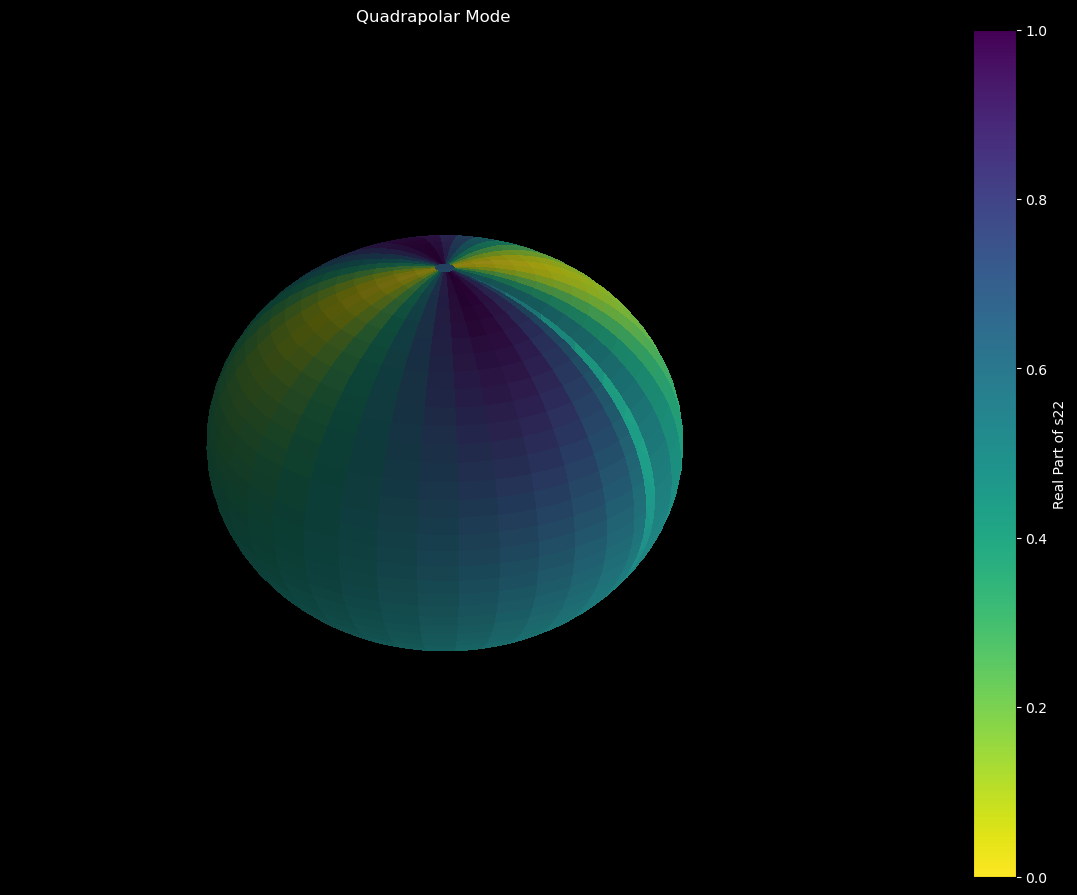

In [4]:
h22 = hdata['Y_l2_m2.dat'][...]
c22 = h22[:, 1] + 1j*h22[:, 2]
m2_Y22 = Yslm_vec(ell=2, emm=2, spin_weight=-2, theta_grid=theta_grid,phi_grid=phi_grid)
s22 = np.einsum('i,jk->ijk', c22, m2_Y22)
St = np.sin(theta_grid)
Ct = np.cos(theta_grid)

Sp = np.sin(phi_grid)
Cp = np.cos(phi_grid)

x = St*Cp
y = St*Sp
z = Ct

fig = plt.figure(figsize=(15, 11))
ax = fig.add_subplot(111, projection='3d')  # Create a subplot with 3D projection

#U = tt1.real
#U = tt1
#U = np.cos(theta_grid)
U = s22[0].real #np.zeros(x.shape)

# Assign color dimension
color_dimension = U # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)

m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])

fcolors = m.to_rgba(color_dimension)

# Set background color to dark
fig.patch.set_facecolor('black')  # Set background color of the figure
ax.set_facecolor('black')  # Set background color of the 3D plot

# Plot surface
surf = ax.plot_surface(x, y, z, linewidth=0, antialiased=False, facecolors=fcolors)

# Set title
ax.set_title('Quadrapolar Mode', color='white')  # Set title and its color

# Create colorbar
#cbar = fig.colorbar(m, ax=ax, pad=0.1)
#cbar.set_label('Real Part of s22', color='white')  # Set colorbar label color
#cbar.ax.yaxis.set_tick_params(color='white')  # Set colorbar tick labels color

# Set color map
surf.set_cmap('viridis_r')  # Reverse colormap for better visibility on dark background

# Set axis labels color
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')

# Set tick labels color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Turn off axis and grid
ax.axis('off')

# Create colorbar
cbar = fig.colorbar(surf, ax=ax, pad=0.1)
cbar.set_label('Real Part of s22', color='white')  # Set colorbar label color
cbar.ax.tick_params(colors='white')  # Set colorbar ticks color



#plt.savefig(f'mode_222_t0.jpg', facecolor='black')  # Save figure with black background

plt.show()

# Plotting two modes with some transperacy

In [5]:
St = np.sin(theta_grid)
Ct = np.cos(theta_grid)
Sp = np.sin(phi_grid)
Cp = np.cos(phi_grid)

x_outer = St*Cp
y_outer = St*Sp
z_outer = Ct

x_inner = 0.5 * x_outer  # Inner sphere with half the radius
y_inner = 0.5 * y_outer
z_inner = 0.5 * z_outer

In [7]:
h22 = hdata['Y_l2_m2.dat'][...]
c22 = h22[:, 1] + 1j*h22[:, 2]
m2_Y22 = Yslm_vec(ell=2, emm=2, spin_weight=-2, theta_grid=theta_grid,phi_grid=phi_grid)
s22 = np.einsum('i,jk->ijk', c22, m2_Y22)

h32 = hdata['Y_l3_m2.dat'][...]
c32 = h32[:, 1] + 1j*h32[:, 2]
m2_Y32 = Yslm_vec(ell=3, emm=2, spin_weight=-2, theta_grid=theta_grid,phi_grid=phi_grid)
s32 = np.einsum('i,jk->ijk', c32, m2_Y32)

In [8]:
U22 = s22[0].real #np.zeros(x.shape)

# Assign color dimension
color_dimension22 = U22 # change to desired fourth dimension
minn22, maxx22 = color_dimension22.min(), color_dimension22.max()
norm22 = matplotlib.colors.Normalize(minn22, maxx22)

m22 = plt.cm.ScalarMappable(norm=norm22, cmap='viridis')
m22.set_array([])

fcolors22 = m22.to_rgba(color_dimension22)

In [9]:
U32 = s32[0].real #np.zeros(x.shape)

# Assign color dimension
color_dimension_32 = U32 # change to desired fourth dimension
minn32, maxx32 = color_dimension_32.min(), color_dimension_32.max()
norm32 = matplotlib.colors.Normalize(minn32, maxx32)

m32 = plt.cm.ScalarMappable(norm=norm32, cmap='viridis')
m32.set_array([])

fcolors32 = m32.to_rgba(color_dimension_32)

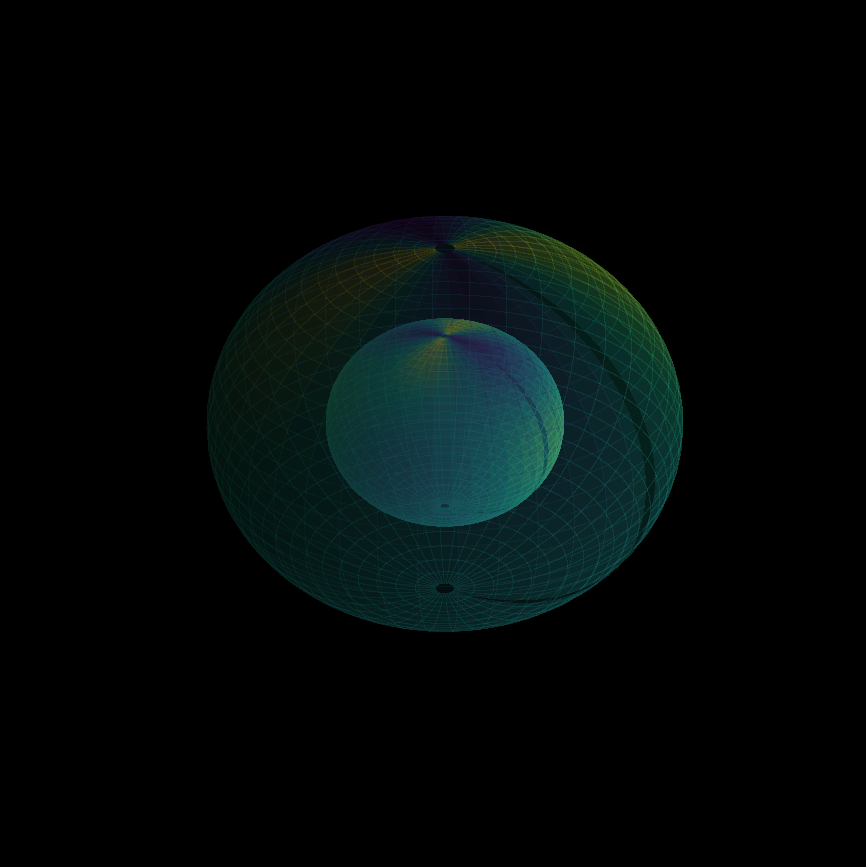

In [10]:
fig = plt.figure(figsize=(15, 11))
ax = plt.axes(projection='3d')

# Set background color to dark
fig.patch.set_facecolor('black')  # Set background color of the figure
ax.set_facecolor('black')  # Set background color of the 3D plot


# Plot surface
surf1 = ax.plot_surface(x_outer, y_outer, z_outer, linewidth=0, antialiased=False, facecolors=fcolors22, alpha = 0.2)
# Plot surface
surf2 = ax.plot_surface(x_inner, y_inner, z_inner, linewidth=0, antialiased=False, facecolors=fcolors32, alpha = 0.5)



# Set color map
surf1.set_cmap('viridis_r')
surf2.set_cmap('viridis_r')  # Reverse colormap for better visibility on dark background

# Set axis labels color
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')

# Set tick labels color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Turn off axis and grid
ax.axis('off')

plt.show()

In [11]:
np.shape(s22)

(17044, 37, 76)

In [13]:
np.shape(s22 [0])

(37, 76)

In [12]:
np.shape(x)

(37, 76)

# Plotting mode with transparancy and with radially changing shape

In [7]:
St = np.sin(theta_grid)
Ct = np.cos(theta_grid)
Sp = np.sin(phi_grid)
Cp = np.cos(phi_grid)

x = St*Cp
y = St*Sp
z = Ct

In [8]:
h32 = hdata['Y_l3_m2.dat'][...]
c32 = h32[:, 1] + 1j*h32[:, 2]
m2_Y32 = Yslm_vec(ell=3, emm=2, spin_weight=-2, theta_grid=theta_grid,phi_grid=phi_grid)
s32 = np.einsum('i,jk->ijk', c32, m2_Y32)

In [10]:
#U = tt1.real
#U = tt1
#U = np.cos(theta_grid)
U32 = s32[0].real #np.zeros(x.shape)

# Creating the grid according to U
xu = U32*x
yu = U32*y
zu = U32*z
# Assign color dimension
color_dimension_32 = U32 # change to desired fourth dimension
minn32, maxx32 = color_dimension_32.min(), color_dimension_32.max()
norm32 = matplotlib.colors.Normalize(minn32, maxx32)

m32 = plt.cm.ScalarMappable(norm=norm32, cmap='viridis')
m32.set_array([])

fcolors32 = m32.to_rgba(color_dimension_32)

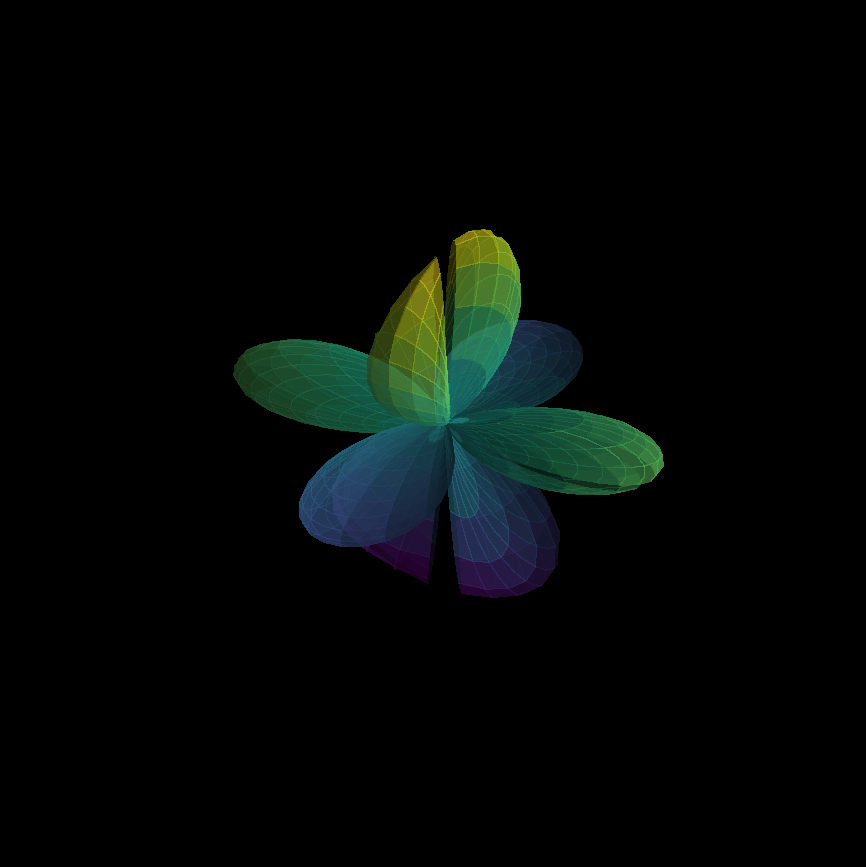

In [11]:
fig = plt.figure(figsize=(15, 11))
ax = plt.axes(projection='3d')
# Set background color to dark
fig.patch.set_facecolor('black')  # Set background color of the figure
ax.set_facecolor('black')  # Set background color of the 3D plot


# Plot surface
surf2 = ax.plot_surface(xu, yu, zu, linewidth=0, antialiased=False, facecolors=fcolors32, alpha = 0.5)
surf2.set_cmap('viridis_r')  # Reverse colormap for better visibility on dark background

# Set axis labels color
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')

# Set tick labels color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Turn off axis and grid
ax.axis('off')

plt.show()

# Plotting multiple modes

In [4]:
St = np.sin(theta_grid)
Ct = np.cos(theta_grid)

Sp = np.sin(phi_grid)
Cp = np.cos(phi_grid)

x = St*Cp
y = St*Sp
z = Ct

In [5]:
h22 = hdata['Y_l2_m2.dat'][...]
c22 = h22[:, 1] + 1j*h22[:, 2]
m2_Y22 = Yslm_vec(ell=2, emm=2, spin_weight=-2, theta_grid=theta_grid,phi_grid=phi_grid)
s22 = np.einsum('i,jk->ijk', c22, m2_Y22)
U22 = s22[0].real #np.zeros(x.shape)

# Creating the grid according to U
xu22 = U22*x
yu22 = U22*y
zu22 = U22*z

# Assign color dimension
color_dimension22 = U22 # change to desired fourth dimension
minn22, maxx22 = color_dimension22.min(), color_dimension22.max()
norm22 = matplotlib.colors.Normalize(minn22, maxx22)

m22 = plt.cm.ScalarMappable(norm=norm22, cmap='viridis')
m22.set_array([])

fcolors22 = m22.to_rgba(color_dimension22)



In [6]:
h21 = hdata['Y_l2_m1.dat'][...]
c21 = h21[:, 1] + 1j*h21[:, 2]
m2_Y21 = Yslm_vec(ell=2, emm=1, spin_weight=-2, theta_grid=theta_grid,phi_grid=phi_grid)
s21 = np.einsum('i,jk->ijk', c21, m2_Y21)
U21 = s21[0].real #np.zeros(x.shape)

# Creating the grid according to U
xu21 = U21*x
yu21 = U21*y
zu21 = U21*z

# Assign color dimension
color_dimension21 = U21 # change to desired fourth dimension
minn21, maxx21 = color_dimension21.min(), color_dimension21.max()
norm21 = matplotlib.colors.Normalize(minn21, maxx21)

m21 = plt.cm.ScalarMappable(norm=norm21, cmap='viridis')
m21.set_array([])

fcolors21 = m21.to_rgba(color_dimension21)

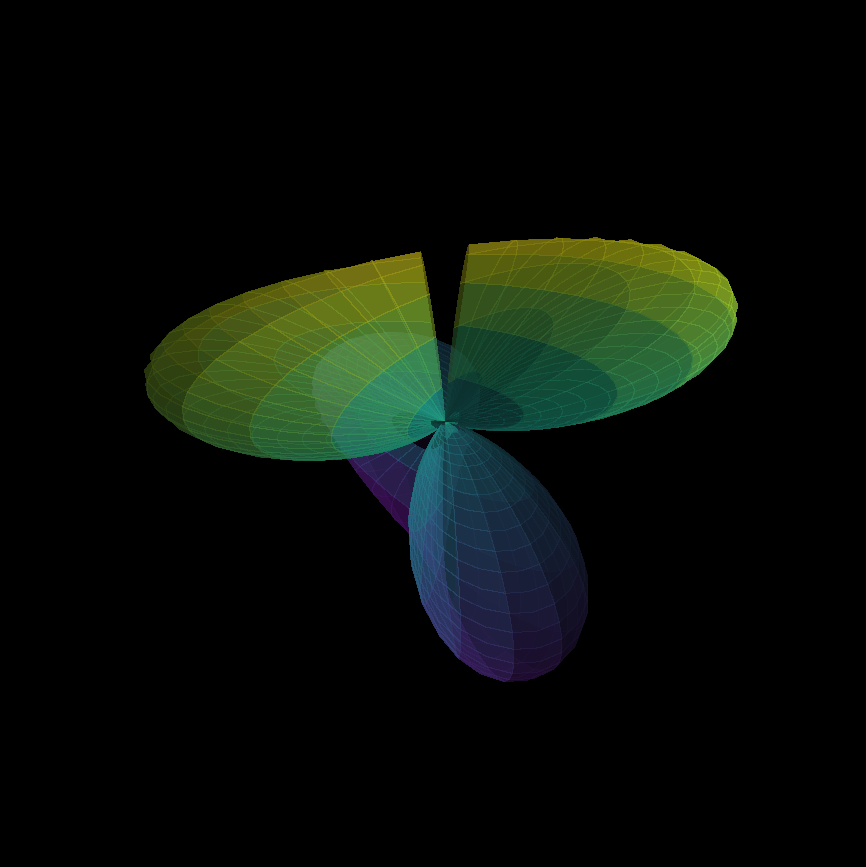

In [10]:
fig = plt.figure(figsize=(15, 11))
ax = plt.axes(projection='3d')

# Set background color to dark
fig.patch.set_facecolor('black')  # Set background color of the figure
ax.set_facecolor('black')  # Set background color of the 3D plot


# Plot surface
surf1 = ax.plot_surface(xu21 , yu21, zu21, linewidth=0, antialiased=False, facecolors=fcolors21, alpha = 0.5)
surf1.set_cmap('viridis_r')
surf2 = ax.plot_surface(xu22, yu22, zu22, linewidth=0, antialiased=False, facecolors=fcolors22, alpha = 0.5)
surf2.set_cmap('viridis_r')  # Reverse colormap for better visibility on dark background

# Set axis labels color
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')

# Set tick labels color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Turn off axis and grid
ax.axis('off')

plt.show()